In [2]:
import pymc3 as pm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import theano.tensor as tt

%matplotlib inline

In [3]:
data = pd.read_csv('datasets/antiseptic-amputation.csv', header=None)
data.columns = ['subject', 'year', 'antiseptic', 'limb', 'outcome']
data.set_index('subject', inplace=True)

# Data normalization
data['year'] = data['year'] - data['year'].min()
data.head()

,year,antiseptic,limb,outcome
subject,,,,
1,0,0,1,0
2,0,0,1,1
3,0,0,1,0
4,0,0,1,0
5,0,0,1,1


The logistic function is defined as

$$ p = \frac{1}{1 + e^{-k}}$$

Here, the $k$ term refers to:

$$ k = \beta_{n}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n} $$

Therefore, we will write it in as such

In [4]:
with pm.Model() as model:   
    betas = pm.Normal('betas', mu=0, sd=100**2, shape=(3,1))
    # betas = pm.Normal('betas', mu=0, sd=100**2)
    x = betas[0] * data['year'] + betas[1] * data['antiseptic'] + betas[2] * data['limb']
    # x = data['antiseptic']
    
    prob = 1 / (1 + np.exp(-x))
    prob_like = pm.Bernoulli('likelihood', p=prob, observed=data['outcome'])

In [5]:
with model:
    trace = pm.sample(draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -73.375: 100%|██████████| 200000/200000 [00:11<00:00, 18108.85it/s]
Finished [100%]: Average ELBO = -73.392
100%|██████████| 2000/2000 [00:04<00:00, 407.64it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f397f44cef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f398261be48>]], dtype=object)

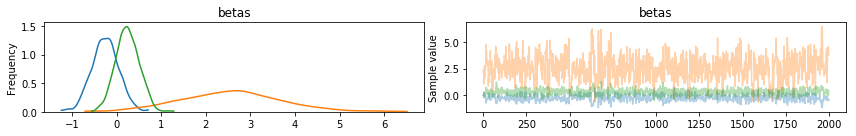

In [6]:
pm.traceplot(trace)

Posterior predictive check.

In [8]:
ppc = pm.sample_ppc(trace, model=model, samples=500)

100%|██████████| 500/500 [00:01<00:00, 257.07it/s]


In [34]:
ppc['likelihood'].mean(axis=0)

array([ 0.56 ,  0.576,  0.554,  0.522,  0.546,  0.538,  0.546,  0.596,
        0.63 ,  0.644,  0.636,  0.564,  0.618,  0.632,  0.628,  0.606,
        0.64 ,  0.428,  0.43 ,  0.428,  0.42 ,  0.47 ,  0.454,  0.452,
        0.474,  0.458,  0.494,  0.484,  0.476,  0.504,  0.498,  0.478,
        0.476,  0.466,  0.484,  0.896,  0.88 ,  0.852,  0.89 ,  0.872,
        0.88 ,  0.912,  0.836,  0.824,  0.842,  0.872,  0.89 ,  0.874,
        0.87 ,  0.848,  0.878,  0.862,  0.85 ,  0.874,  0.868,  0.882,
        0.87 ,  0.854,  0.852,  0.788,  0.776,  0.788,  0.806,  0.796,
        0.804,  0.808,  0.826,  0.85 ,  0.844,  0.836,  0.86 ,  0.838,
        0.796,  0.84 ,  0.83 ])

In [48]:
preds = np.rint(ppc['likelihood'].mean(axis=0)).astype('int')

In [46]:
data['outcome'].values

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1])

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(preds, data['outcome'])

0.71999999999999997

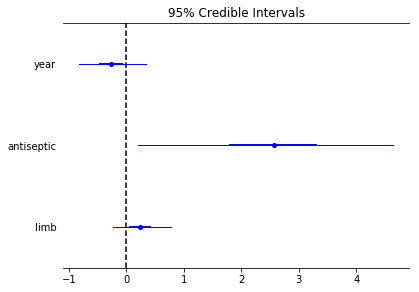

In [7]:
pm.forestplot(trace, ylabels=['year', 'antiseptic', 'limb'])

The use of antiseptics, as we can see, has the greatest effect on survival.